<a href="https://colab.research.google.com/github/juanigp/CT-denoising/blob/master/Hyperparameter_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -l -s git://github.com/juanigp/CT-denoising.git cloned-repo
%cd cloned-repo
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

from matplotlib import pyplot as plt
import pickle

Cloning into 'cloned-repo'...
remote: Enumerating objects: 270, done.
remote: Total 270 (delta 0), reused 0 (delta 0), pack-reused 270
Receiving objects: 100% (270/270), 41.17 MiB | 32.78 MiB/s, done.
Resolving deltas: 100% (135/135), done.
/content/cloned-repo
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


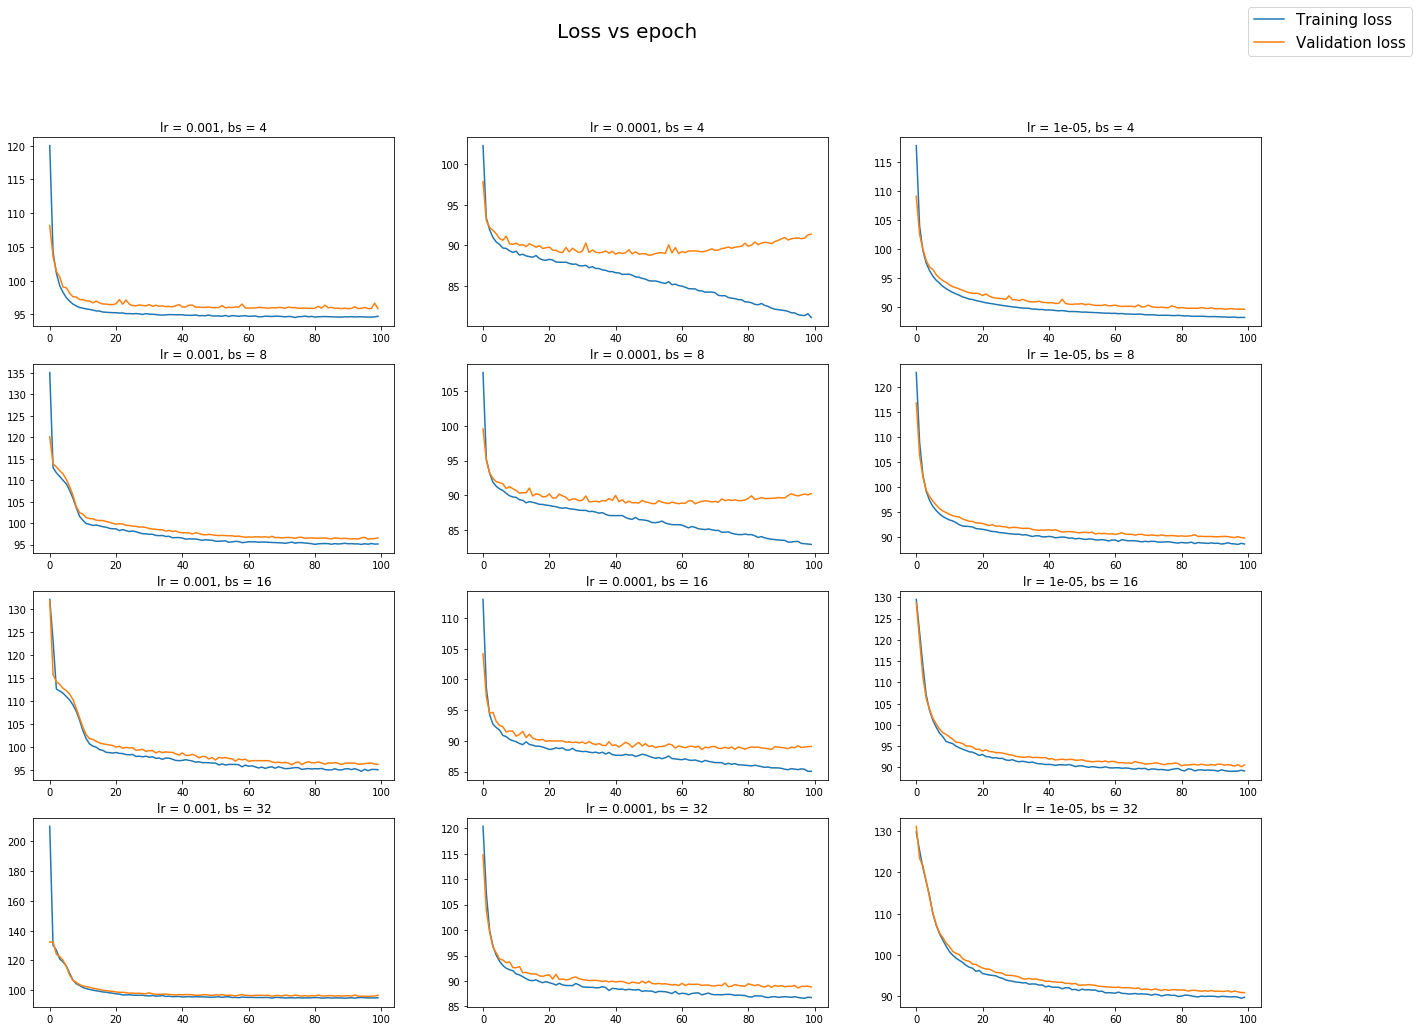

In [20]:
filename = r'/gdrive/My Drive/patches/hyperparams_analysis_2.txt'
with open(filename, "rb") as fp:   # Unpickling
  b = pickle.load(fp)

rows = 4
cols = 3
fig, axs = plt.subplots(rows, cols, figsize = (22,16))
fig.suptitle('Loss vs epoch', fontsize = 20)
for i in range(rows):
    for j in range(cols):
        idx = j*rows + i
        training_loss = b[0][idx][0]
        validation_loss = b[1][idx][0]
        axs[i, j].plot(training_loss)
        axs[i, j].plot(validation_loss)
        axs[i, j].set_title('lr = ' + str(b[0][idx][1]['lr'])+
                            ', bs = ' + str(b[0][idx][1]['batch_size']))
    
fig.legend(('Training loss', 'Validation loss'), loc='upper right', fontsize = 15)
plt.savefig('losses.svg')      